# Compare salinometer and CTD salinity

Parse .btl file data together with salinometer readings and have a look at the differences.

The basic idea:
- Compare SBE911+ reading salinity (`.btl` files) with salinometer readings from bottle samples.
   - (Exclude data collected near the surface where the background variance is large..) 
- If the overall differences are small, we can consider the CTD salinity profiles "validated".
- If the differences are significant, we may have to make ad-hoc adjustments to CTD salinit
    - E.g. apply an offset or multiplier, or some sort of correction for modeled sensor drift.
    - Corrections are not covered explicitly by `kval` functions 
___

Notes about the code:

- Using functionality from `kval.data.ship_ctd_tools.qc_salt` 
- The parser functions in `qc_salt` are tailored to the format developed by Paul Dodd. Not sure how robust they are.
- Ultimately, we will have to think about whether we actually want to include this sort of ad-hoc stuff in `kval`.

___

##### Imports

In [1]:
from kval.data.ship_ctd_tools import qc_salt
%matplotlib widget
# Note: Ignore the deprecation warning

/home/oyvindl/work/code/python/kval/src/kval/data/ship_ctd_tools/qc_salt.py:15: UserWarning: The seawater library is deprecated! Please use gsw instead.
  from seawater import eos80


### Load and combine data

Reading data from: 
- `.btl` files
- Salinometer data sheet
- CTD log sheet (used to co-locate samples and btl file values) 

##### Define locations of the inputs

In [6]:
btl_dir = '../../data/source/btl/' # Wherever we have out .btl files 
salts_sheet = '../../data/source/salinometer/salts_2019.xls' # Wherever we have out salts excel sheet 
log_sheet = '../../data/source/salinometer/ctd_2019.xls' # Wherever we have out ctd log sheet

##### Load them into a common object

In [7]:
ds_sal = qc_salt.setup_sal_qc(salts_sheet, log_sheet, btl_dir=btl_dir)

Reading log sheet..
Reading salts sheet..
Reading .btl data:
Found 60 .btl files in "../../data/source/btl/".
Loaded 60 profiles from list of Datasets.


Joining profiles together:   0%|          | 0/60 [00:00<?, ?it/s]

## Plot of salinity differences

Helper function generating a plot comparing btl file and salinometer salinity. 

The `min_pres` parameter means that we ignore samples collected shallower than this depth.  

On the bottom left is a histogram of the diffrerences between the two; this should be clustered pretty near zero. If they are not, we probably need to consider applying an offset to te CTD salinity..

Button(description='Close', layout=Layout(width='200px'), style=ButtonStyle())

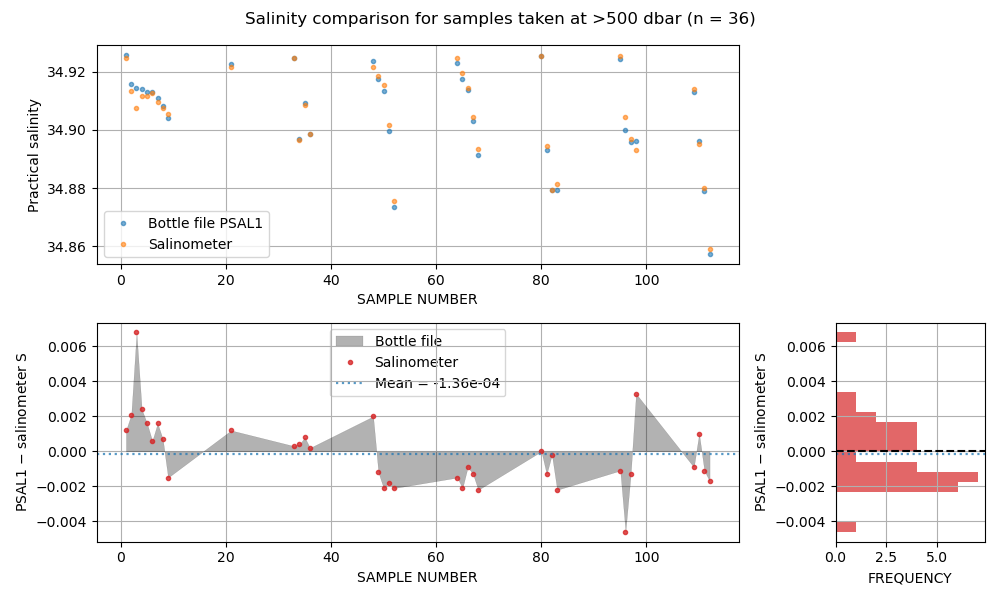

In [8]:
# Look at primary salinity (PSAL1)

qc_salt.plot_by_sample(ds_sal, min_pres=500)


Button(description='Close', layout=Layout(width='200px'), style=ButtonStyle())

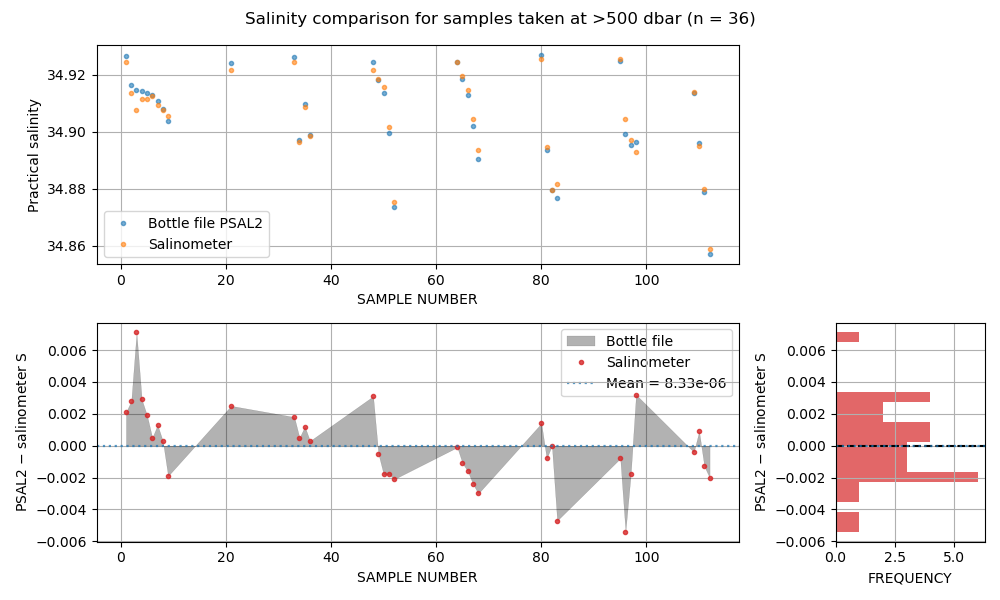

In [9]:
# Look at secondary salinity (PSAL2)
qc_salt.plot_by_sample(ds_sal, psal_var='PSAL2', min_pres = 500)